# Prometheus workbook

In addition to the Python API, this library also provides several Magics to help integrate with [Jupyter](https://jupyter.org/) workbooks.

In [1]:
%matplotlib inline
import prometheus_pandas.ipython.magic

## Instant queries

The `%%prometheus_query` cell Magic allows evaluating instant query at a single point in time. Depending on the query, it may return a vector (`pd.Series`), matrix (`pd.DataFrame`), scalar (`np.float64`) or string (`str`).

### Usage
```
%%prometheus_query prometheus_url [-t|--time <rfc3339 | unix_timestamp>] [-T|--timeout <duration>] [output]
    instant_query
```

In [2]:
%%prometheus_query http://localhost:9090
    rate(node_cpu_seconds_total{mode="user"}[1m])

{cpu="0",instance="localhost:9100",job="node",mode="user"}     0.013111
{cpu="1",instance="localhost:9100",job="node",mode="user"}     0.025333
{cpu="10",instance="localhost:9100",job="node",mode="user"}    0.022222
{cpu="11",instance="localhost:9100",job="node",mode="user"}    0.055556
{cpu="12",instance="localhost:9100",job="node",mode="user"}    0.013111
{cpu="13",instance="localhost:9100",job="node",mode="user"}    0.011778
{cpu="14",instance="localhost:9100",job="node",mode="user"}    0.014667
{cpu="15",instance="localhost:9100",job="node",mode="user"}    0.012000
{cpu="2",instance="localhost:9100",job="node",mode="user"}     0.016889
{cpu="3",instance="localhost:9100",job="node",mode="user"}     0.025111
{cpu="4",instance="localhost:9100",job="node",mode="user"}     0.012444
{cpu="5",instance="localhost:9100",job="node",mode="user"}     0.015778
{cpu="6",instance="localhost:9100",job="node",mode="user"}     0.015556
{cpu="7",instance="localhost:9100",job="node",mode="user"}     0

## Range queries

The `%%prometheus_query_range` cell Magic allows evaluating expression query over a range of time. It always returns a matrix (`pd.DataFrame`).

### Usage
```
%%prometheus_query_range prometheus_url start end step [-T|--timeout <duration>] [output]
    range_query
```

In [3]:
%%prometheus_query_range http://localhost:9090 2021-01-20T00:00:00Z 2021-01-21T00:00:00Z 1h
    rate(node_cpu_seconds_total{mode="user",cpu="0"}[1m])

,"{cpu=""0"",instance=""localhost:9100"",job=""node"",mode=""user""}"
2021-01-20 00:00:00,0.013111
2021-01-20 01:00:00,0.012444
2021-01-20 02:00:00,0.012000
2021-01-20 03:00:00,0.020222
2021-01-20 04:00:00,0.024222
2021-01-20 05:00:00,0.011111
2021-01-20 06:00:00,0.016000
2021-01-20 07:00:00,0.012000
2021-01-20 08:00:00,0.018444
2021-01-20 09:00:00,0.014667


If the `output` parameter is provided then the results will be assigned to a variable of that name.

In [4]:
%%prometheus_query_range http://localhost:9090 2021-01-20T00:00:00Z 2021-01-21T00:00:00Z 1m data
    sum by(mode) (rate(node_cpu_seconds_total{mode=~"user|system"}[1m]))

<AxesSubplot:>

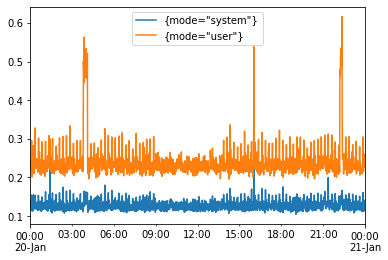

In [5]:
data.plot()

The `%%prometheus_query_range_now` function is like `query_range` except that it's relative to the current time. It's useful for building real-time graphs.

In [6]:
%%prometheus_query_range_now http://localhost:9090 12h 1m data
    sum by(mode) (rate(node_cpu_seconds_total{mode=~"user|system"}[1m]))

<AxesSubplot:>

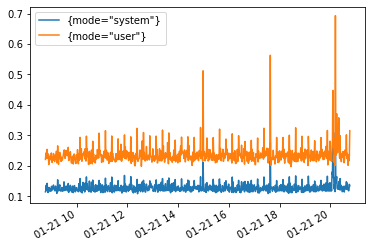

In [7]:
data.plot()

For more details see the documentation on Prometheus' [HTTP API](https://prometheus.io/docs/prometheus/latest/querying/api/).